# <font color='yellow'> Business case </font>

Addressing the Cardiovascular diseases epidemic is a critical global health challenge. By developing a machine learning model to predict CVD risk, we can take a significant step towards:

Saving Lives: Early detection and intervention can reduce mortality rates and improve patient outcomes.
Reducing Healthcare Costs: Preventive measures and early management can help mitigate the economic burden of CVDs.
Enhancing Quality of Life: Identifying and managing CVD risk factors can improve overall well-being and reduce the impact of the disease on individuals and their families.
Advancing Precision Medicine: A CVD prediction model can contribute to the development of personalized healthcare approaches, tailoring interventions to individual needs and risk profiles.

# <font color='yellow'> Domain Analysis </font>

- Understanding the Problem

Cardiovascular diseases (CVDs) represent a major global health concern, causing a substantial number of deaths each year. Heart attacks and strokes are primary contributors to this mortality, and a significant portion of these deaths occur prematurely in individuals under 70. Heart failure, a common complication of CVDs, further exacerbates the issue.

- The Role of Early Detection and Management

Early detection and management are crucial in addressing CVDs. Individuals with CVDs or at high risk due to various risk factors require timely interventions to prevent adverse outcomes. Traditional methods of diagnosis and management can be time-consuming and may not always be sufficient.

- Machine Learning as a Solution

Machine learning offers a promising approach to enhancing the diagnosis and management of CVDs. By analyzing relevant medical data, machine learning models can predict the likelihood of heart disease with greater accuracy and efficiency. This can enable healthcare providers to identify individuals at risk earlier and implement appropriate preventive measures.

- The Dataset and its Importance

The dataset containing 11 features related to heart disease plays a vital role in training and evaluating machine learning models. These features provide valuable insights into the factors that contribute to the development of CVDs. By analyzing these features, machine learning algorithms can learn patterns and correlations that may not be readily apparent to human experts.


In [261]:
## Importing related libraries

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [263]:
import warnings 
warnings.filterwarnings('ignore')
# imported warning libraries to ignore the warnings 

In [264]:
df=pd.read_csv('values.csv')
df
# impored values dataset in df 

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [265]:
df1=pd.read_csv('labels.csv')
df1
# imported labels dataset in df1

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


# <font color='yellow'>Basic Checks</font>

In [266]:
df1

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [267]:
df.head()
# to check top rows in dataset

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [268]:
df.tail()
# to check bottom rows

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


In [269]:
df.info()
# to get the information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [270]:
df.describe()
# to get statical information about dataset

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [271]:
df.describe(include='O')  ## Patient id and thal column contain some categorical values

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


In [272]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [273]:
df=df.rename(columns={'patient_id':'patient_id','slope_of_peak_exercise_st_segment': 'peak_exercise', 'thal':'thal',
       'resting_blood_pressure':'resting_bp', 'chest_pain_type':'chest_pain_type', 'num_major_vessels':'major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl':'fasting_bs', 'resting_ekg_results':'resting_ekg',
       'serum_cholesterol_mg_per_dl':'serum_cholesterol', 'oldpeak_eq_st_depression':'oldpeak_depression', 'sex':'sex', 'age':'age',
       'max_heart_rate_achieved':'max_heart', 'exercise_induced_angina':'exercise'})

# rename the column names for better understanding

In [274]:
df   # input & training data

,patient_id,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [275]:
df1   # testing, output columns

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [276]:
df1.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [277]:
df3 = pd.merge(df, df1, on='patient_id', how='left')  
df3

# join values and label dataset for training the model


,patient_id,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


As we can see in the above data, some columns are contionous and some of them are categorical.
So we need to categorize the data.

### Continuous Data:  
Definition: Continuous data can take any value within a range and is typically measured, not counted. Examples include age, height, weight, blood pressure, etc.  
Continuous Variables: resting_bp, serum_cholesterol, age, max_heart, oldpeak_depression  

### Categorical data:     
Definition: Categorical data represents discrete categories or groups. The values are usually finite and are often not numbers (but if they are, the numbers represent categories, not quantities).  
Categorical Variables: peak_exercise, thal , chest_pain_type , major_vessels, fasting_bs, resting_ekg, sex, exercise

# <font color='yellow'> EDA </font>

### <font color='yellow'> Univarite analysis </font>
##### <font color='red'>For  Continuous Data </font>

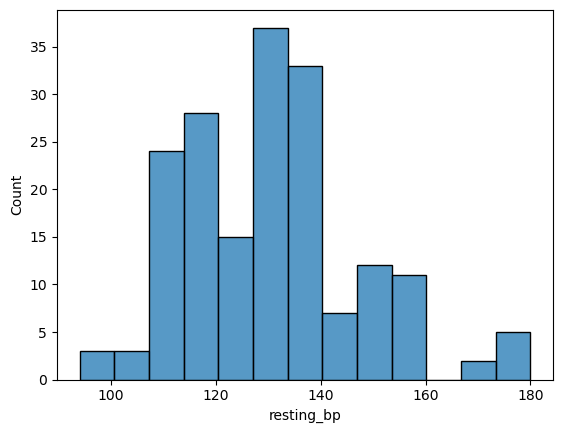

In [278]:
sns.histplot(x=df.resting_bp)
plt.show()

##### Insights =  Most individuals likely fall within the range of 120 to 140 , indicating a common resting BP

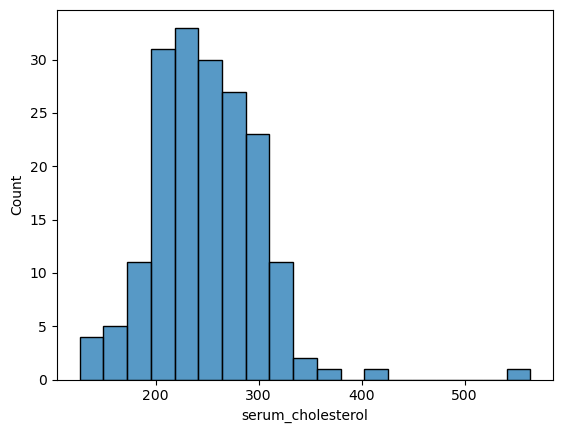

In [279]:
sns.histplot(x=df.serum_cholesterol)
plt.show()

##### Insights = The majority of individuals have serum cholesterol level within  200 to 300 but there are smakker number of individuals who exhibit significantly higher serum cholesterol level

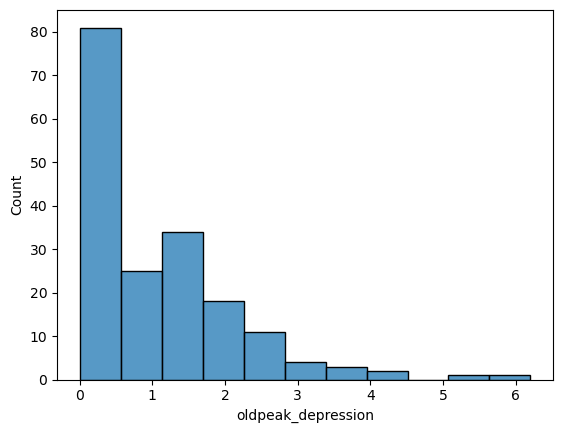

In [280]:
sns.histplot(x=df.oldpeak_depression)
plt.show()

##### insights = smajority of individuals have oldpeak depression values within a specific range, but there are a smaller number of individuals who exhibit significantly higher oldpeak depression.

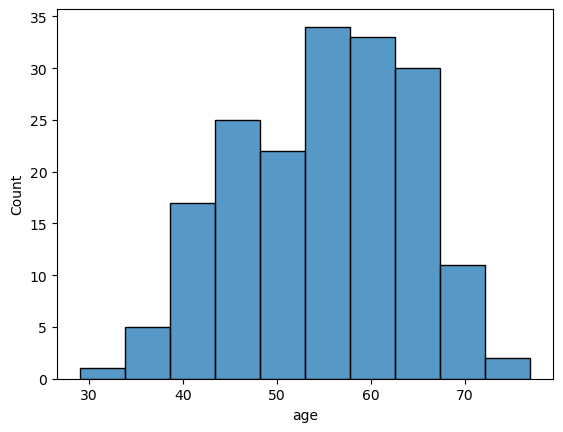

In [281]:
sns.histplot(x=df.age)
plt.show()

##### Insights = number of individuals of age group 45 to 67 are more

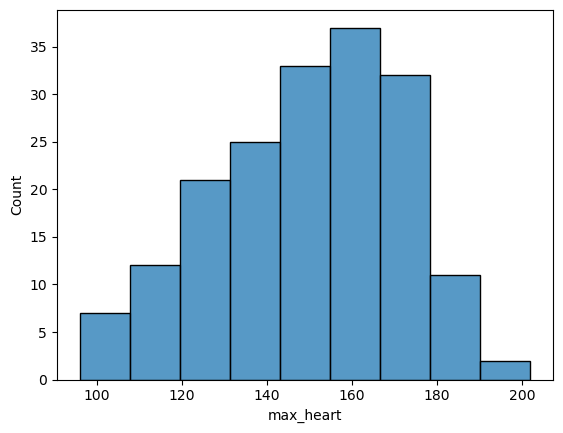

In [282]:
sns.histplot(x=df.max_heart)
plt.show()

##### Insights = majority of individuals are having the heart rate is between 140 to 180

### <font color='yellow'> Univarite analysis </font>
##### <font color='red'>For  Categorical Data </font>

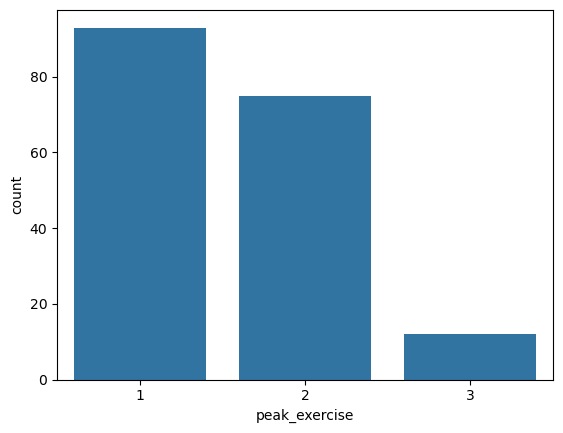

In [283]:
sns.countplot(x=df.peak_exercise)
plt.show()

##### Insight = Most individuals likely fall within the range of 1.00 to 2.00 , indicating a common peak exercise

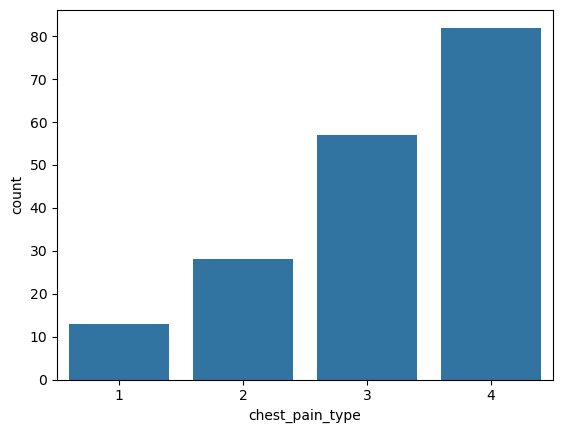

In [284]:
sns.countplot(x=df.chest_pain_type)
plt.show()

##### Insight = Chest pain type 4 appears to be the most common with the highest count .  Chest pain types 1,2 and 3 have relatively lower counts , suggested that they are less frequent in dataset

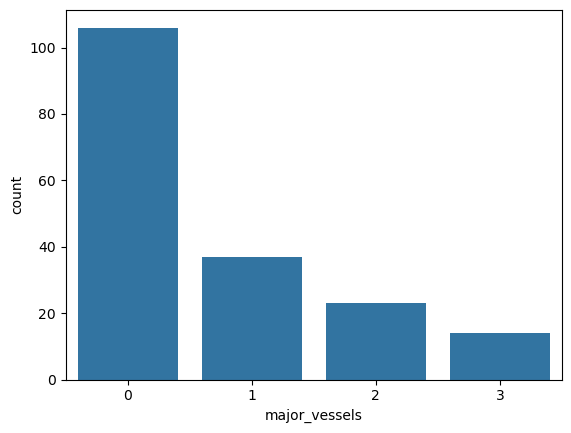

In [285]:
sns.countplot(x=df.major_vessels)
plt.show()

##### Insights = The majority of individuals have no major vessels affected , indicating that this is the most common scenario

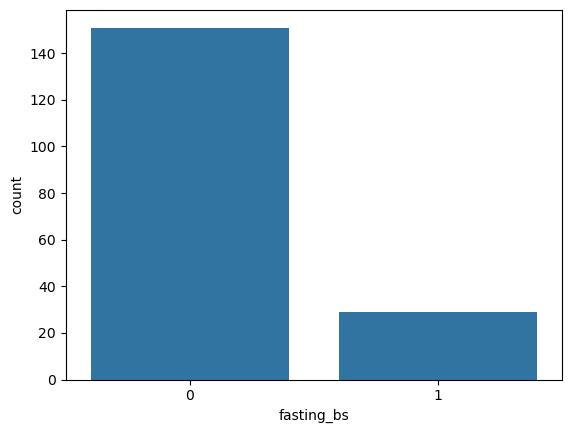

In [286]:
sns.countplot(x=df.fasting_bs)
plt.show()

##### Insights = it appears to be bimodal with two distinct peaks , one with lower FBS level and another with higher FBS level 

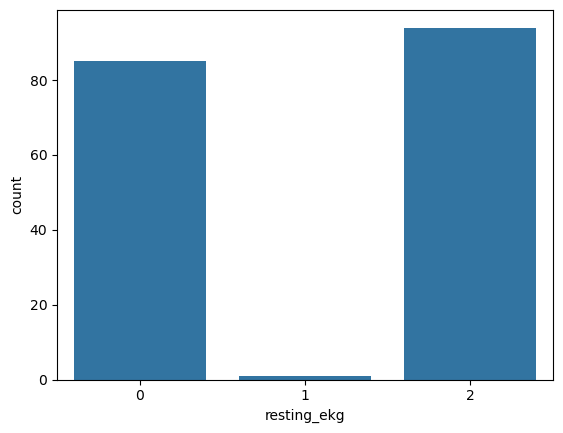

In [287]:
sns.countplot(x=df.resting_ekg)
plt.show()

##### Insights = The majority of individuals likely fall within the lower resting EKG range, indicating a normal or near normal EKG

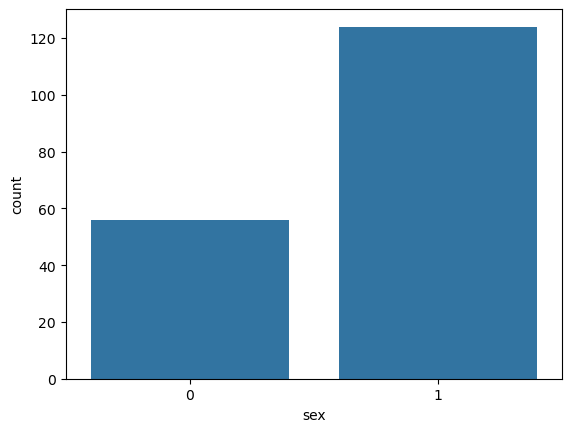

In [288]:
sns.countplot(x=df.sex)
plt.show()

##### Insights = majority of individuals are male as compare to female 

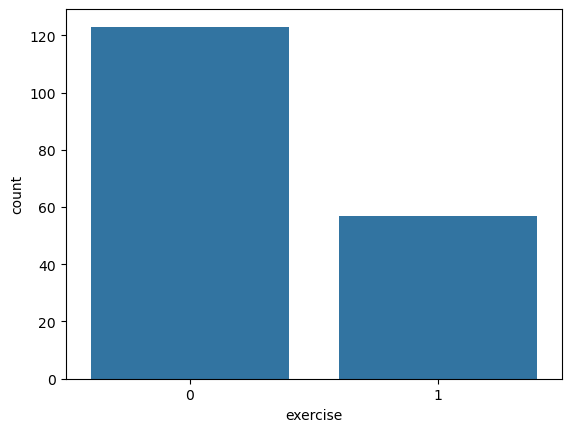

In [289]:
sns.countplot(x=df.exercise)
plt.show()

##### Insights = The exercise categories "0.2" and "1.0" have relatively lower counts, indicating that they are less

### <font color='yellow'> Bivatite analysis </font>
#### <font color='red'> Continous Data  </font>

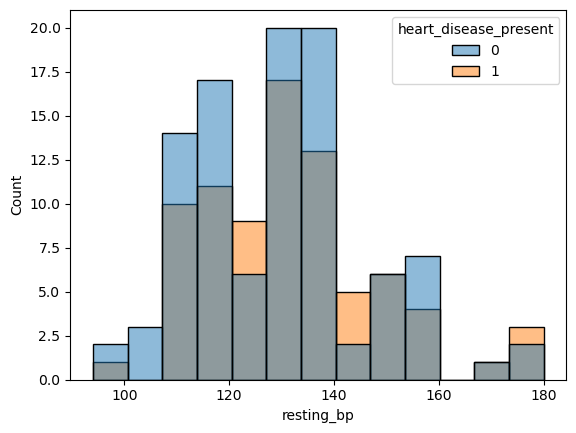

In [290]:
sns.histplot(x=df.resting_bp, hue=df1.heart_disease_present)
plt.show()

##### Insights = As the resting blood pressure range exceeds the of approximately 0.35 % the chances of having a Heart disease increases

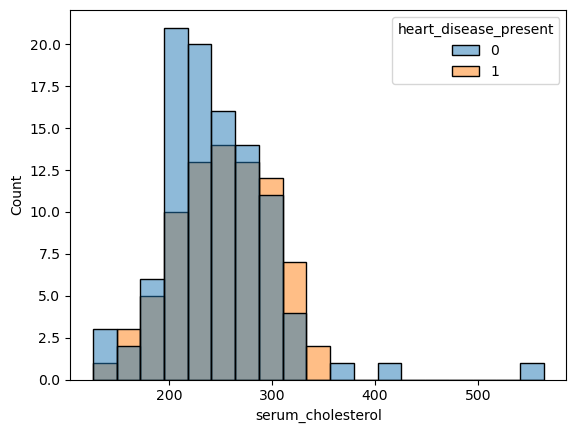

In [291]:
sns.histplot(x=df.serum_cholesterol, hue=df1.heart_disease_present)
plt.show()

##### Insights =if your serum_cholestrol is in between the range of 0.25 to 0.6 then you won't have a Heart disease

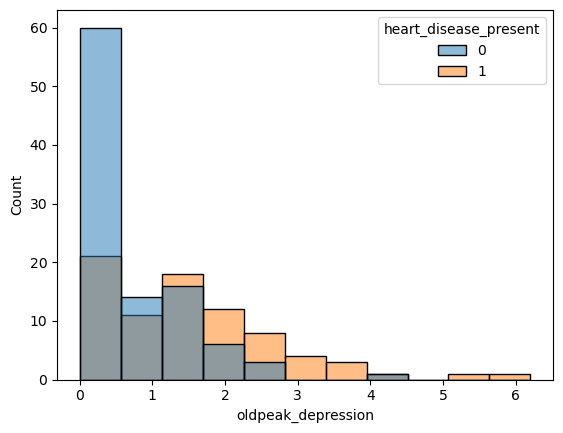

In [292]:
sns.histplot(x=df.oldpeak_depression, hue=df1.heart_disease_present)
plt.show()

##### Insights = As the oldpeak_depression count increases the chances of getting a Heart Disease also increases rapidly

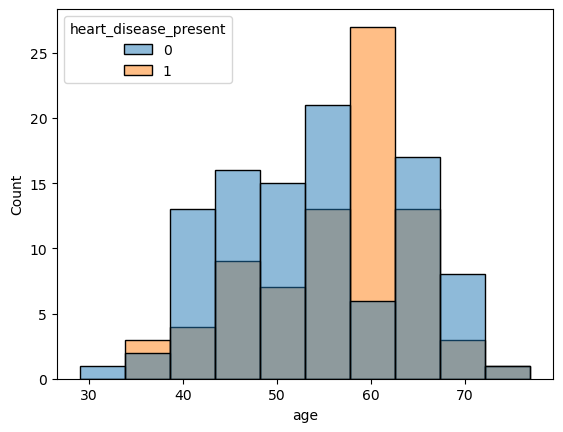

In [293]:
sns.histplot(x=df.age, hue=df1.heart_disease_present)
plt.show()

##### Insights = number of individuals of age group 60 to 70 are more likely to have a Heart Disease

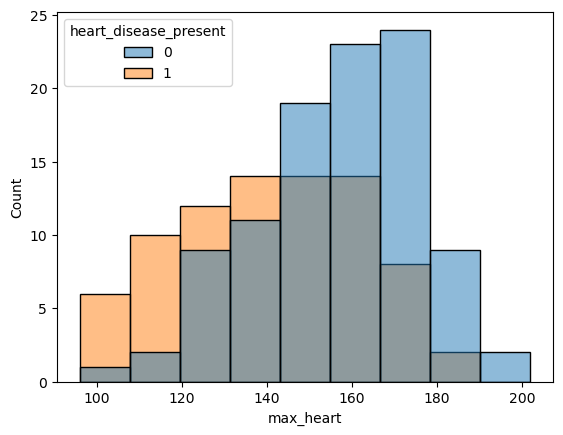

In [294]:
sns.histplot(x=df.max_heart, hue=df1.heart_disease_present)
plt.show()

##### Insights = majority of individuals are having the heart rate less than 0.4 have heart disease present

### <font color='yellow'> Bivatite analysis </font>
#### <font color='red'> Categorical Data  </font>

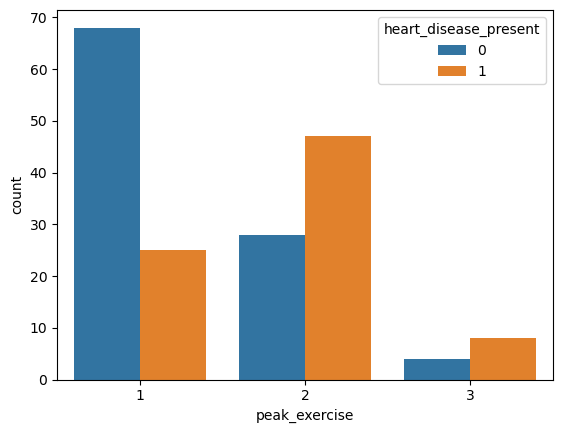

In [295]:
sns.countplot(x=df.peak_exercise, hue=df1.heart_disease_present)
plt.show()

##### Insights - Patients with a slope of 2 during peak exercise are less likely to have heart disease compared to those with slopes of 1 or 3.

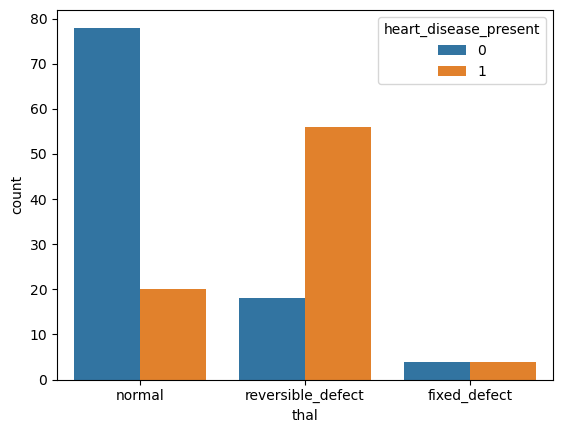

In [296]:
sns.countplot(x=df.thal, hue=df1.heart_disease_present)
plt.show()

##### Insights = Individuals with a reversible defect in thalassemia status exhibit a higher incidence of heart disease compared to those with normal thalassemia. 

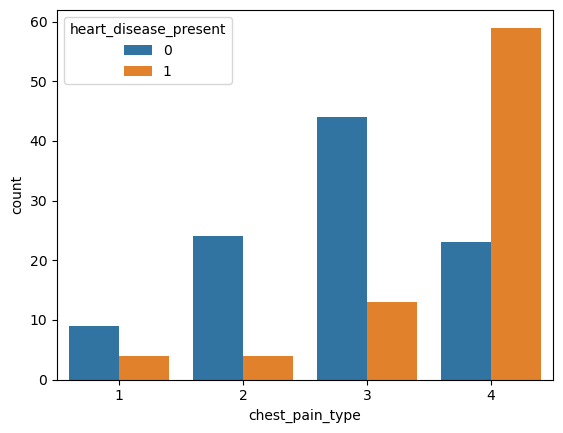

In [297]:
sns.countplot(x=df.chest_pain_type, hue=df1.heart_disease_present)
plt.show()

##### Insights = Certain chest pain types, such as type 3, are more prevalent among patients with heart disease.

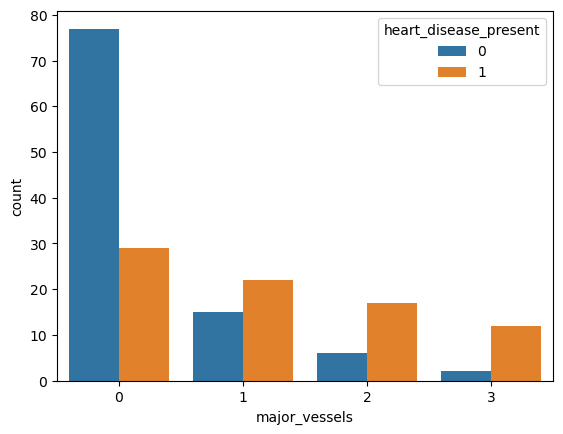

In [298]:
sns.countplot(x=df.major_vessels, hue=df1.heart_disease_present)
plt.show()

##### Insights = An increased number of major vessels colored by fluoroscopy correlates with a higher presence of heart disease.

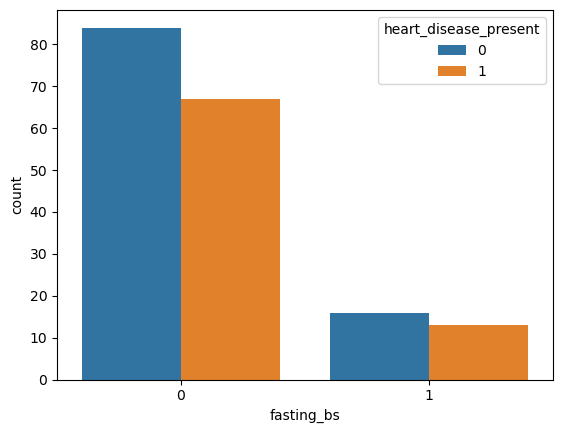

In [299]:
sns.countplot(x=df.fasting_bs, hue=df1.heart_disease_present)
plt.show()

##### Insights = Patients with fasting blood sugar levels above 120 mg/dl show a higher risk of heart disease.

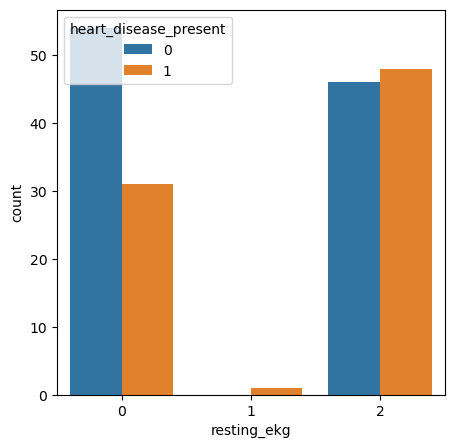

In [300]:
plt.figure(figsize=(5,5))
sns.countplot(x=df.resting_ekg, hue=df1.heart_disease_present)
plt.show()

##### Insights = Patients with resting EKG results of type 0 are more likely to be heart disease-free, while type 2 results show a more balanced distribution of heart disease presence.

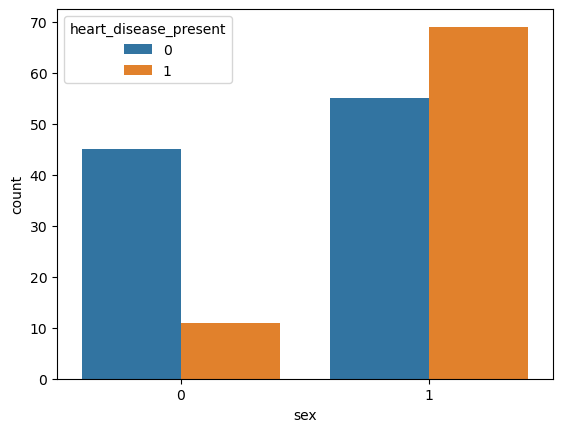

In [301]:
sns.countplot(x=df.sex, hue=df1.heart_disease_present)
plt.show()

##### Insights = Male patients are more likely to have heart disease compared to female patients.

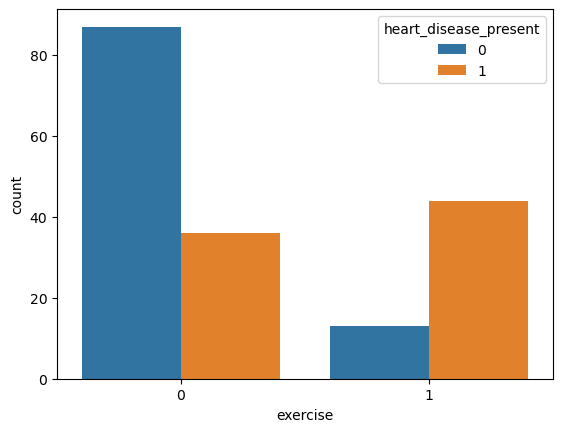

In [302]:
sns.countplot(x=df.exercise, hue=df1.heart_disease_present)
plt.show()

##### Insights = Presence of exercise-induced angina is strongly associated with the presence of heart disease.

# <font color='yellow'> Data preprocessing </font>

### <font color='red'> checking for outliers in the data </font>

In [303]:
df3.isnull().sum()    # No Null values

patient_id               0
peak_exercise            0
thal                     0
resting_bp               0
chest_pain_type          0
major_vessels            0
fasting_bs               0
resting_ekg              0
serum_cholesterol        0
oldpeak_depression       0
sex                      0
age                      0
max_heart                0
exercise                 0
heart_disease_present    0
dtype: int64

### <font color='yellow'> checking for outliers in the data </font>

In [304]:
df3

,patient_id,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


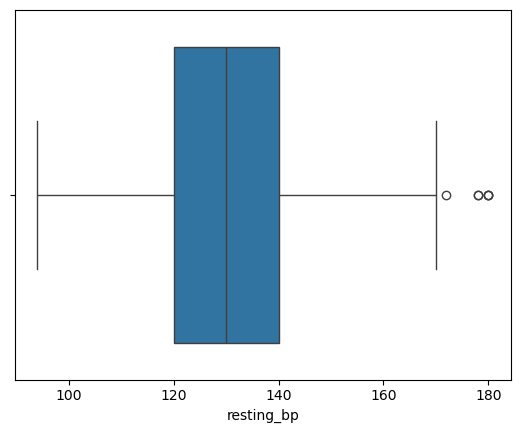

In [305]:
sns.boxplot(x=df3.resting_bp)
plt.show()

# resting_bp column has outliers

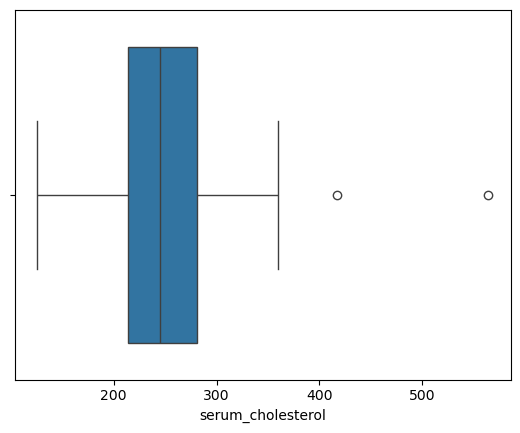

In [306]:
sns.boxplot(x=df3.serum_cholesterol)
plt.show()

# serum_cholesterol column has outliers

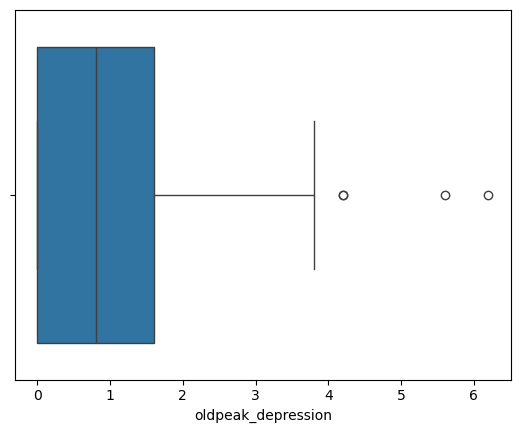

In [307]:
sns.boxplot(x=df3.oldpeak_depression)
plt.show()

# oldpeak_depression column has outliers

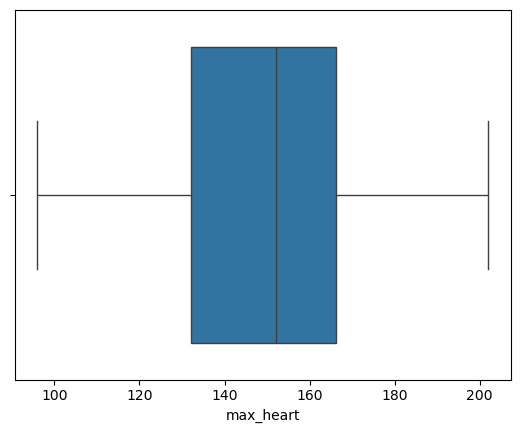

In [308]:
sns.boxplot(x=df3.max_heart)
plt.show()  ## There are no outliers in max_heart column

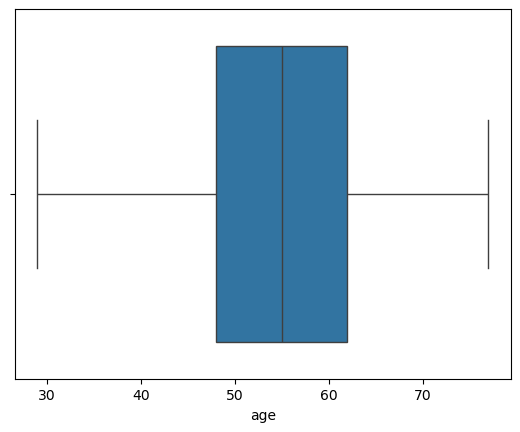

In [309]:
sns.boxplot(x=df3.age)
plt.show()  ## There are no outliers in age column

In [310]:
# Handling the outliers

df3.loc[df3.resting_bp > 170, 'resting_bp']=np.median(df3.resting_bp)
df3.loc[df3.serum_cholesterol >400, 'serum_cholesterol']=np.median(df3.serum_cholesterol)
df3.loc[df3.oldpeak_depression > 4 ,'oldpeak_depression']=np.median(df3.oldpeak_depression)

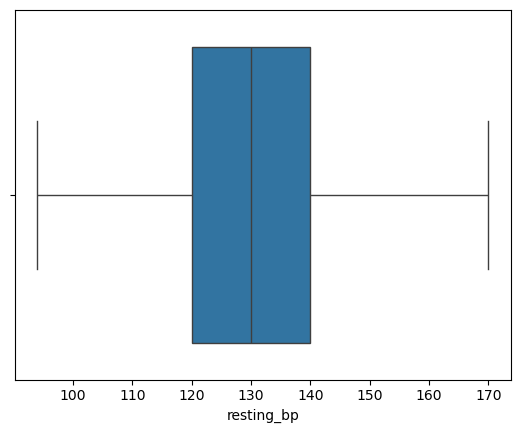

In [311]:
sns.boxplot(x=df3.resting_bp)
plt.show()

# outliers has been removed

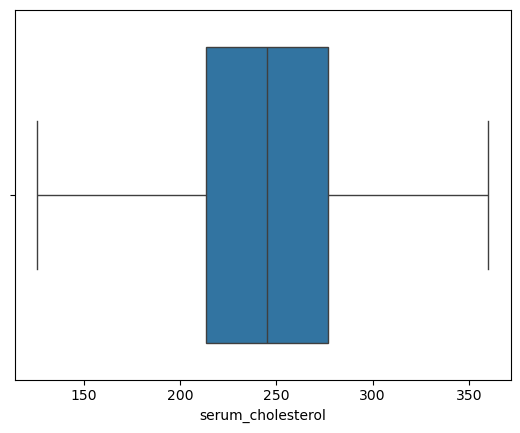

In [312]:
sns.boxplot(x=df3.serum_cholesterol)
plt.show()

# outliers has been removed

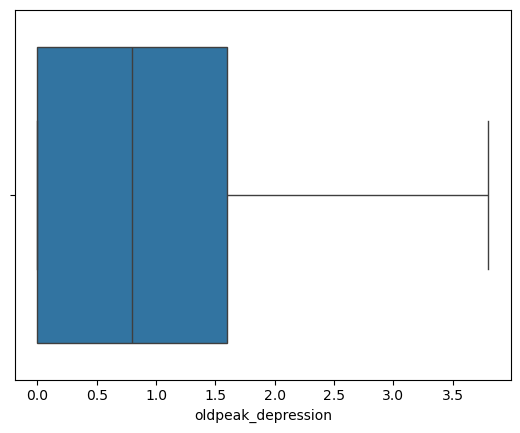

In [313]:
sns.boxplot(x=df3.oldpeak_depression)
plt.show()

# outliers has been removed

### <font color='yellow'> Encoding </font>

Encoding is the process of converting these categorical values into a numerical format that the algorithms can use

In [314]:
from sklearn.preprocessing import LabelEncoder  # Importing the LabelEncoder

In [315]:
le= LabelEncoder()  

In [316]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             180 non-null    object 
 1   peak_exercise          180 non-null    int64  
 2   thal                   180 non-null    object 
 3   resting_bp             180 non-null    int64  
 4   chest_pain_type        180 non-null    int64  
 5   major_vessels          180 non-null    int64  
 6   fasting_bs             180 non-null    int64  
 7   resting_ekg            180 non-null    int64  
 8   serum_cholesterol      180 non-null    float64
 9   oldpeak_depression     180 non-null    float64
 10  sex                    180 non-null    int64  
 11  age                    180 non-null    int64  
 12  max_heart              180 non-null    int64  
 13  exercise               180 non-null    int64  
 14  heart_disease_present  180 non-null    int64  
dtypes: flo

In [317]:
df3.thal=le.fit_transform(df.thal)    # encoding the thal column

In [318]:
df3.patient_id=le.fit_transform(df.patient_id)   # encoding the patient_id column

In [319]:
df3.head()

,patient_id,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise,heart_disease_present
0,6,1,1,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,147,2,1,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,172,1,1,125,4,3,0,2,304.0,0.0,1,77,162,1,1
3,112,1,2,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,133,3,2,130,1,0,0,2,270.0,0.8,1,59,145,0,0


### <font color='yellow'> Scaling the data </font>

Scaling in machine learning is essential because it standardizes the range of independent variables or features, ensuring that all features contribute equally to the model

In [320]:
from sklearn.preprocessing import MinMaxScaler   # importing MinMaxScaler

In [321]:
ms= MinMaxScaler()

In [328]:
 df3[['resting_bp','serum_cholesterol','max_heart','age']]=ms.fit_transform(df3[['resting_bp','serum_cholesterol','max_heart','age']])


In [329]:
df3.head()

,patient_id,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise,heart_disease_present
0,6,1,1,0.447368,2,0,0,2,0.777778,0.0,1,0.333333,0.698113,0,0
1,147,2,1,0.210526,3,0,0,0,0.376068,1.6,0,0.520833,0.584906,0,0
2,172,1,1,0.407895,4,3,0,2,0.760684,0.0,1,1.000000,0.622642,1,1
3,112,1,2,0.763158,4,0,0,0,0.414530,0.0,1,0.229167,0.801887,0,1
4,133,3,2,0.473684,1,0,0,2,0.615385,0.8,1,0.625000,0.462264,0,0


In [330]:
df3.fasting_bs.unique()

array([0, 1], dtype=int64)

In [331]:
## finding the correalation of data

In [332]:
np.median(df3.fasting_bs)

0.0

### <font color='yellow' > Feature selection </font>

In [67]:
df3.drop('patient_id' , axis=1 )

# as we dont require patient_id column , drop patient_id column

,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise,heart_disease_present
0,1,1,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304.0,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,3,2,130,1,0,0,2,270.0,0.8,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254.0,0.2,1,67,163,0,1
176,2,1,130,4,0,0,1,327.0,3.4,0,55,117,1,1
177,2,2,125,3,0,0,0,309.0,1.8,1,64,131,1,1
178,1,1,124,3,2,1,0,255.0,0.0,1,48,175,0,0


In [68]:
df3.corr()

#Correlation in feature selection is used to identify and eliminate redundant features, thereby improving the efficiency and
# performance of a machine learning model

,patient_id,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise,heart_disease_present
patient_id,1.000000,-0.021570,0.046226,0.054130,0.054496,0.001383,0.044933,0.054588,-0.066896,-0.104404,0.058200,0.033113,0.036123,0.003103,-0.029908
peak_exercise,-0.021570,1.000000,0.154101,0.061536,0.121207,0.076832,0.050199,0.172191,-0.047307,0.535583,0.093340,0.169918,-0.418102,0.225459,0.344224
thal,0.046226,0.154101,1.000000,-0.062529,0.269583,0.174107,-0.070225,-0.052171,0.023872,0.189707,0.265420,-0.007934,-0.142098,0.360395,0.447214
resting_bp,0.054130,0.061536,-0.062529,1.000000,-0.037038,0.090367,0.096842,0.113544,0.163281,0.110505,-0.016618,0.259479,-0.014901,0.056117,0.076048
chest_pain_type,0.054496,0.121207,0.269583,-0.037038,1.000000,0.249061,-0.088992,0.033379,0.081077,0.070715,0.086057,0.085001,-0.301792,0.346266,0.412829
major_vessels,0.001383,0.076832,0.174107,0.090367,0.249061,1.000000,0.169792,0.096656,0.135630,0.167406,0.073107,0.347355,-0.275687,0.153407,0.421519
fasting_bs,0.044933,0.050199,-0.070225,0.096842,-0.088992,0.169792,1.000000,0.053864,0.001109,-0.002458,0.066010,0.176101,0.058369,-0.005956,0.003379
resting_ekg,0.054588,0.172191,-0.052171,0.113544,0.033379,0.096656,0.053864,1.000000,0.141028,0.118666,0.045786,0.126856,-0.102766,0.037773,0.145933
serum_cholesterol,-0.066896,-0.047307,0.023872,0.163281,0.081077,0.135630,0.001109,0.141028,1.000000,-0.006879,-0.087374,0.200082,-0.108363,0.137476,0.146419
oldpeak_depression,-0.104404,0.535583,0.189707,0.110505,0.070715,0.167406,-0.002458,0.118666,-0.006879,1.000000,0.121071,0.202029,-0.324242,0.263756,0.388253


If the column has no variance (i.e., all values are 0 or all are 1), it won't contribute to any analysis or model, as it doesn't provide distinguishing information Given that this column isn't adding value and is showing NaN in correlation analysis, it's reasonable to remove it. Focus on other features that provide more predictive power or meaningful correlations.

<Axes: >

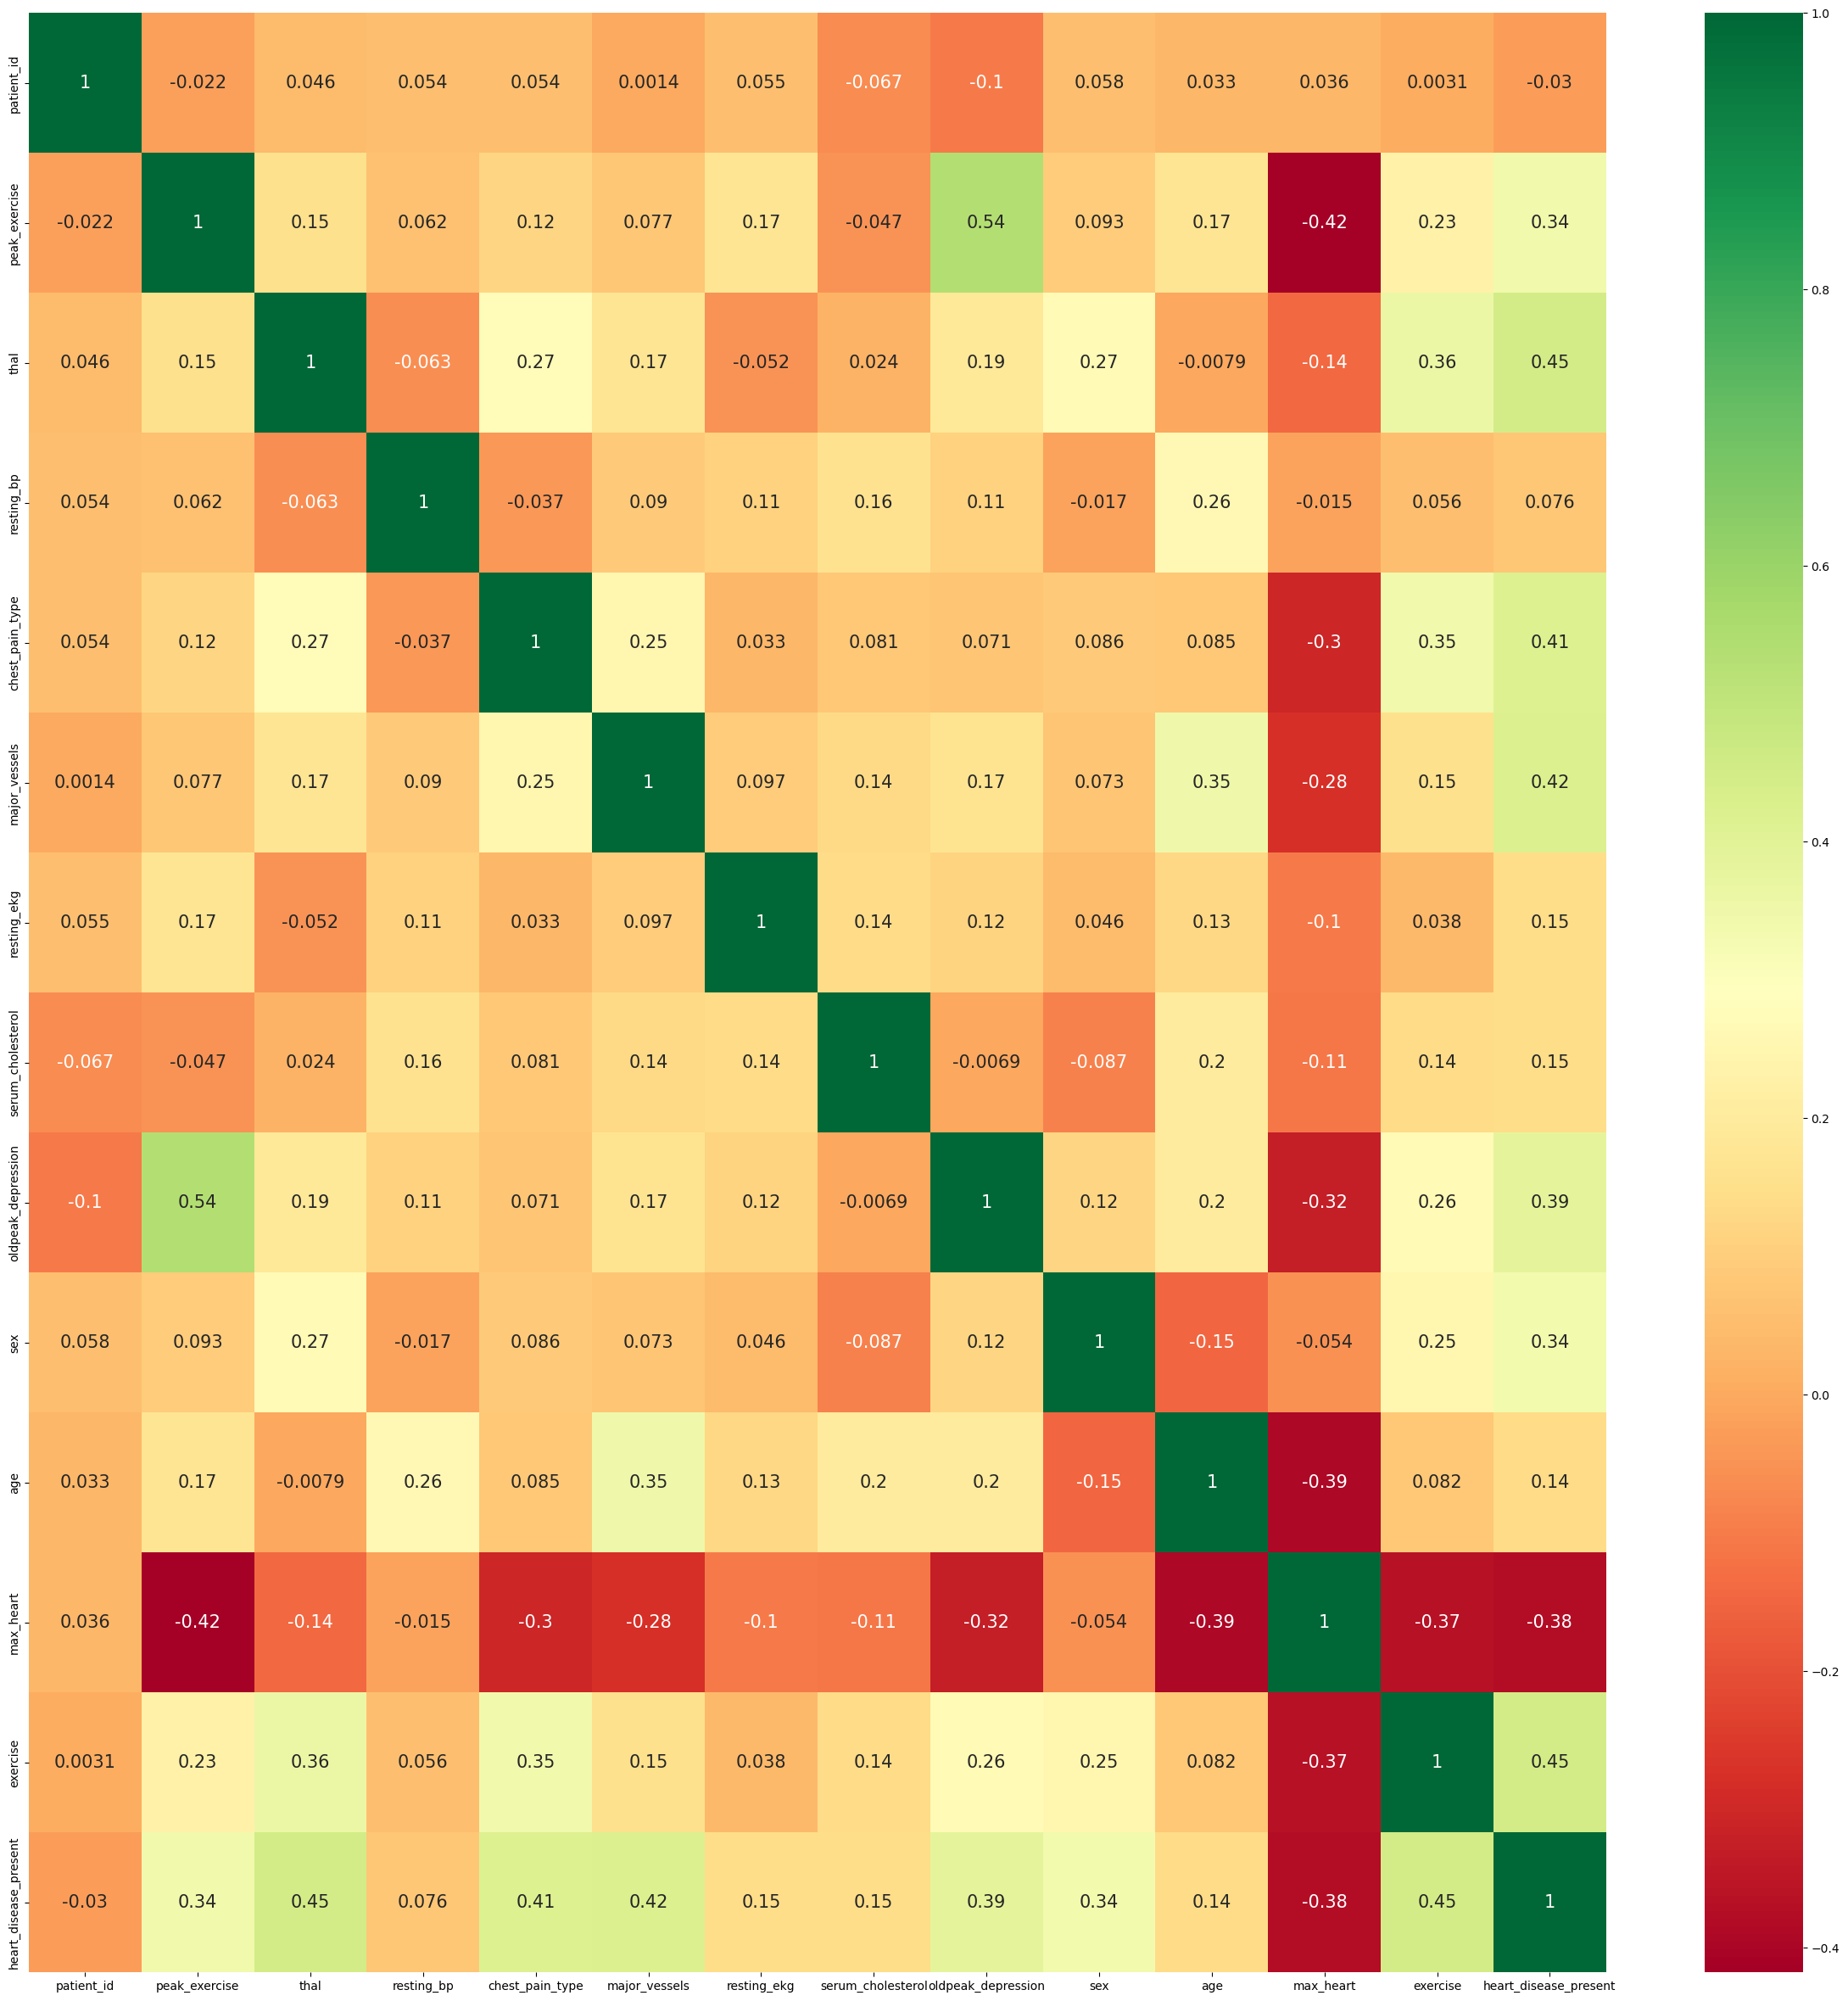

In [69]:
plt.figure(figsize=(30, 30))
sns.heatmap(df3.drop('fasting_bs', axis = 1).corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

#A heatmap is commonly used in machine learning to visualize the relationship between variables, particularly when analyzing the
#correlation between features.

# <font color='yellow'> Model Training </font>

##### spliting dataset into training , testing 

In [70]:
x=df3.drop(['heart_disease_present','patient_id'], axis=1)
x

,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise
0,1,1,128,2,0,0,2,308.0,0.0,1,45,170,0
1,2,1,110,3,0,0,0,214.0,1.6,0,54,158,0
2,1,1,125,4,3,0,2,304.0,0.0,1,77,162,1
3,1,2,152,4,0,0,0,223.0,0.0,1,40,181,0
4,3,2,130,1,0,0,2,270.0,0.8,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254.0,0.2,1,67,163,0
176,2,1,130,4,0,0,1,327.0,3.4,0,55,117,1
177,2,2,125,3,0,0,0,309.0,1.8,1,64,131,1
178,1,1,124,3,2,1,0,255.0,0.0,1,48,175,0


In [71]:
y=df3.heart_disease_present
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split    
# importing the train_test_split to split the data into training and testing

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42) 
# training data is 80% and 20% data is for testing 

In [74]:
x_train   

,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise
132,1,1,130,2,0,0,2,204.0,1.4,0,41,172,0
90,2,1,134,2,0,0,0,271.0,0.0,0,49,162,0
38,1,1,120,2,1,0,2,269.0,0.2,0,74,121,1
169,2,1,110,1,0,0,2,211.0,1.8,1,64,144,1
115,1,1,140,3,0,1,2,211.0,0.0,1,58,165,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,112,4,0,0,0,204.0,0.1,1,47,143,0
106,1,2,150,3,0,0,2,232.0,1.6,1,54,165,0
14,2,2,120,1,0,0,0,231.0,3.8,1,38,182,1
92,1,1,135,3,0,1,0,304.0,0.0,0,54,170,0


In [75]:
y_train

132    0
90     0
38     0
169    0
115    0
      ..
71     0
106    0
14     1
92     0
102    1
Name: heart_disease_present, Length: 135, dtype: int64

### <font color='yellow'> Balancing the data </font>

Balancing is important in machine learning because it addresses issues related to class imbalance in datasets, where one class significantly outnumbers the other(s). This imbalance can lead to biased models that perform well on the majority class but poorly on the minority class. 

In [76]:
y_train.value_counts()  # as the data is balanced , no need to balance the data

heart_disease_present
0    81
1    54
Name: count, dtype: int64

# <font color='yellow'> Applying Logistic Regression </font>

In [77]:
from sklearn.linear_model import LogisticRegression
Log=LogisticRegression(random_state=42)

# initializes a logistic regression model from Scikit-learn.

In [78]:
Log.fit(x_train,y_train)  # fitting trainig data

LogisticRegression(random_state=42)

In [79]:
y_predict_Log= Log.predict(x_test)
y_predict_Log    # predicting for x_test

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [80]:
y_test.values

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1], dtype=int64)

## <font color='yellow'>   Model Evaluation for Logistic Regression </font>

In [81]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , classification_report , roc_auc_score

In [82]:
accuracy_score(y_test,y_predict_Log)

0.7777777777777778

In [83]:
 precision_score(y_test,y_predict_Log)    

0.8636363636363636

In [84]:
recall_score(y_test,y_predict_Log)                                    

0.7307692307692307

In [85]:
f1_score(y_test,y_predict_Log)  

0.7916666666666666

In [86]:
confusion_matrix(y_test,y_predict_Log)

array([[16,  3],
       [ 7, 19]], dtype=int64)

In [87]:
print(classification_report(y_test,y_predict_Log))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.86      0.73      0.79        26

    accuracy                           0.78        45
   macro avg       0.78      0.79      0.78        45
weighted avg       0.79      0.78      0.78        45



In [88]:
roc_auc_score(y_test,y_predict_Log)

0.7864372469635628

# <font color='green'> Hyperparameter tuning for Logistic Regression </font>

Hyperparameter tuning is important in machine learning because it optimizes the settings of a model to improve its performance, accuracy, and generalization by finding the best combination of hyperparameters that yields the best results on the validation data.

In [89]:
from sklearn.model_selection import GridSearchCV

# Imports the GridSearchCV class, which performs an exhaustive search over a specified parameter grid to find the optimal hyperparameters 

In [90]:
param_gride = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

##### The param_grid defines a grid of hyperparameters for GridSearchCV to explore for tuning a logistic regression model, including different penalties (l1, l2, etc.), regularization strengths (C values on a log scale), solvers, and iteration limits. This setup helps find the optimal combination of these parameters.

In [91]:
gride=GridSearchCV(LogisticRegression(random_state=42), param_gride ,scoring='f1', verbose=3, cv=2 )
gride
# Initializes a grid search to find the best hyperparameters for a logistic regression model 

GridSearchCV(cv=2, estimator=LogisticRegression(random_state=42),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             scoring='f1', verbose=3)

In [92]:
gride.fit(x_train,y_train)

Fitting 2 folds for each of 1600 candidates, totalling 3200 fits
[CV 1/2] END C=0.0001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/2] END C=0.0001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/2] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/2] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/2] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear;, score=0.000 total time=   0.0s
[CV 2/2] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/2] END C=0.0001, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/2] END C=0.0001, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/2] END C=0.0001, max_iter=100, penalty=l1, solver=saga;, score=0.000 total time=   0.0s
[CV 2/2] END C=0.0001, max_iter=100, penalty=l1, solver=saga;, score=0.000 total 

GridSearchCV(cv=2, estimator=LogisticRegression(random_state=42),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             scoring='f1', verbose=3)

In [93]:
gride.best_params_
#  retrieves the best hyperparameters found by the grid search for the logistic regression model.

{'C': 1.623776739188721,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [94]:
gride.best_estimator_
# returns the logistic regression model with the best hyperparameters found by the grid search

LogisticRegression(C=1.623776739188721, random_state=42, solver='newton-cg')

In [95]:
clf_Log=LogisticRegression(C=1.623776739188721, max_iter=5000, random_state=42,
                   solver='sag')
# initializes a logistic regression model with a specific regularization strength, maximum iterations, random state for 
# reproducibility, and the 'sag' solver

In [96]:
clf_Log.fit(x_train,y_train)   # fitting the model

LogisticRegression(C=1.623776739188721, max_iter=5000, random_state=42,
                   solver='sag')

In [97]:
y_hyp_Log=clf_Log.predict(x_test)
y_hyp_Log

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [98]:
accuracy_score(y_test,y_hyp_Log)

0.7555555555555555

In [99]:
precision_score(y_test,y_hyp_Log)

0.8947368421052632

In [100]:
recall_score(y_test,y_hyp_Log)

0.6538461538461539

In [101]:
f1_score(y_test,y_hyp_Log)

0.7555555555555555

In [102]:
confusion_matrix(y_test,y_hyp_Log)

array([[17,  2],
       [ 9, 17]], dtype=int64)

In [103]:
print(classification_report(y_test,y_hyp_Log))

              precision    recall  f1-score   support

           0       0.65      0.89      0.76        19
           1       0.89      0.65      0.76        26

    accuracy                           0.76        45
   macro avg       0.77      0.77      0.76        45
weighted avg       0.79      0.76      0.76        45



In [104]:
roc_auc_score(y_test,y_hyp_Log)

0.7742914979757085

## <font color='yellow'> Applying KNN </font>

In [105]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
# initializes a k-nearest neighbors classifier with default parameters.

In [106]:
Error=[]
for i in range (1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_predict1=knn.predict(x_test)
    error=(y_test != y_predict1).sum()/len(y_test)*100
    Error.append(error)

# The code snippet calculates and appends the classification error percentage for a k-nearest neighbors model
# with varying n_neighbors values from 1 to 9, storing the results in the Error list.

In [107]:
Error

[48.888888888888886,
 46.666666666666664,
 44.44444444444444,
 51.11111111111111,
 48.888888888888886,
 51.11111111111111,
 48.888888888888886,
 53.333333333333336,
 51.11111111111111,
 55.55555555555556]

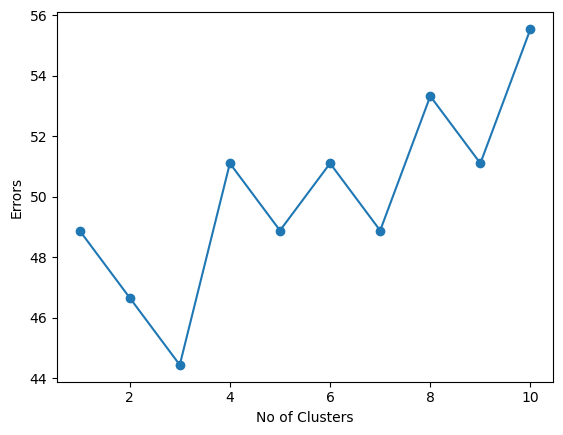

In [108]:
plt.plot(range(1,11),Error, marker='o')
plt.xlabel('No of Clusters')
plt.ylabel('Errors')
plt.show()

#  plots the classification errors against the number of neighbors, with markers at each data point, and 
# labels the x-axis as 'No of Clusters' and the y-axis as 'Errors' before displaying the plot.

In [109]:
KNN=KNeighborsClassifier(n_neighbors=7)
#  initializes a k-nearest neighbors classifier with 7 neighbors.

In [110]:
KNN.fit(x_train,y_train)  # fitting the data

KNeighborsClassifier(n_neighbors=7)

In [111]:
y_predict_KNN=KNN.predict(x_test)
y_predict_KNN

# predict the values for x_test

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1], dtype=int64)

In [112]:
y_test.values

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1], dtype=int64)

## <font color='yellow' >  Model Evaluation for KNN </font> 

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [114]:
accuracy_score(y_test,y_predict_KNN)

0.5111111111111111

In [115]:
precision_score(y_test,y_predict_KNN)

0.7

In [116]:
recall_score(y_test,y_predict_KNN)

0.2692307692307692

In [117]:
f1_score(y_test,y_predict_KNN)

0.3888888888888889

In [118]:
confusion_matrix(y_test,y_predict_KNN)

array([[16,  3],
       [19,  7]], dtype=int64)

In [119]:
print(classification_report(y_test,y_predict_KNN))

              precision    recall  f1-score   support

           0       0.46      0.84      0.59        19
           1       0.70      0.27      0.39        26

    accuracy                           0.51        45
   macro avg       0.58      0.56      0.49        45
weighted avg       0.60      0.51      0.47        45



In [120]:
roc_auc_score(y_test,y_predict_KNN)

0.5556680161943319

## <font color='green'> Hyperparameter tuning for KNN</font>

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
grid_params = { 'n_neighbors' : [7],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

#grid_params dictionary specifies a grid of hyperparameters for tuning a k-nearest neighbors classifier, 
#including n_neighbors, weights, and metric options

We will use three hyperparamters- n-neighbors, weights and metric.

n_neighbors: Decide the best k based on the values we have computed earlier.
weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
metric: The distance metric to be used will calculating the similarity

In [123]:
gride_knn=GridSearchCV(KNeighborsClassifier(), grid_params ,scoring='f1', verbose=3, cv=4 )
gride_knn

# initializes a grid search to optimize k-nearest neighbors hyperparameters using the specified parameter grid,
# aiming to maximize the F1 score with 4-fold cross-validation and detailed logging

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [7],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=3)

In [124]:
 gride_knn.fit(x_train,y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV 1/4] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.381 total time=   0.0s
[CV 2/4] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.444 total time=   0.0s
[CV 3/4] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.480 total time=   0.0s
[CV 4/4] END metric=minkowski, n_neighbors=7, weights=uniform;, score=0.632 total time=   0.0s
[CV 1/4] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.381 total time=   0.0s
[CV 2/4] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.600 total time=   0.0s
[CV 3/4] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.462 total time=   0.0s
[CV 4/4] END metric=minkowski, n_neighbors=7, weights=distance;, score=0.600 total time=   0.0s
[CV 1/4] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.381 total time=   0.0s
[CV 2/4] END metric=euclidean, n_neighbors=7, weights=uniform;, score=0.444 total

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [7],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=3)

In [125]:
gride_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [126]:
gride_knn.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [127]:
hyp=KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')


In [128]:
hyp.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [129]:
y_hyp_predict=hyp.predict(x_test)
y_hyp_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1], dtype=int64)

In [130]:
accuracy_score(y_test,y_hyp_predict)

0.5333333333333333

In [131]:
precision_score(y_test,y_hyp_predict)

0.8571428571428571

In [132]:
recall_score(y_test,y_hyp_predict)

0.23076923076923078

In [133]:
f1_score(y_test,y_hyp_predict)

0.36363636363636365

In [134]:
confusion_matrix(y_test,y_hyp_predict)

array([[18,  1],
       [20,  6]], dtype=int64)

In [135]:
print(classification_report(y_test,y_hyp_predict))

              precision    recall  f1-score   support

           0       0.47      0.95      0.63        19
           1       0.86      0.23      0.36        26

    accuracy                           0.53        45
   macro avg       0.67      0.59      0.50        45
weighted avg       0.70      0.53      0.48        45



# <font color='yellow'> Applying SVM </font>

In [136]:
from sklearn.svm import SVC
SV=SVC()
#initializes a support vector classifier with default parameters.

In [137]:
SV.fit(x_train,y_train)   # Fitting the training data

SVC()

In [138]:
y_predict_SV=SV.predict(x_test)
y_predict_SV   
# predicting the x_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [139]:
y_test.values

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1], dtype=int64)

## <font color='yellow'> Model Evaluation for SVM </font>

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [141]:
accuracy_score(y_test,y_predict_SV)

0.4222222222222222

## <font color='green'> Hyperparameter tuning for SVM </font>

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
param_grid_SV = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}
# defines a grid of hyperparameters for tuning a support vector classifier, specifying different values for the regularization
# parameter C and the kernel coefficient gamma.

In [144]:
grid_SV = GridSearchCV(SV, param_grid_SV, scoring='f1', cv = 5, verbose = 3)
grid_SV
# initializes a grid search to find the best hyperparameters

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [145]:
grid_SV.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.000 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.000 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.000 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.000 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.000 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.000 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.000 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.000 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.000 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.000 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.000 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [146]:
grid_SV.best_params_  
# retrieves the best hyperparameters found by the grid search for the support vector classifier.

{'C': 1000, 'gamma': 0.0001}

In [147]:
grid_SV.best_estimator_
# returns the support vector classifier with the best hyperparameters found by the grid search.

SVC(C=1000, gamma=0.0001)

In [148]:
clf_SV=SVC(C=1000, gamma=0.0001)
#  initializes a support vector classifier with a regularization parameter C of 1000 and a kernel coefficient gamma of 0.0001.

In [149]:
clf_SV.fit(x_train,y_train)

SVC(C=1000, gamma=0.0001)

In [150]:
y_hyp_SV=clf_SV.predict(x_test)
y_hyp_SV

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1], dtype=int64)

In [151]:
accuracy_score(y_test,y_hyp_SV)

0.7555555555555555

In [152]:
precision_score(y_test,y_hyp_SV)

0.8571428571428571

In [153]:
recall_score(y_test,y_hyp_SV)

0.6923076923076923

In [154]:
f1_score(y_test,y_hyp_SV)

0.7659574468085107

In [155]:
confusion_matrix(y_test,y_hyp_SV)

array([[16,  3],
       [ 8, 18]], dtype=int64)

In [156]:
print(classification_report(y_test,y_hyp_SV))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74        19
           1       0.86      0.69      0.77        26

    accuracy                           0.76        45
   macro avg       0.76      0.77      0.76        45
weighted avg       0.78      0.76      0.76        45



In [157]:
roc_auc_score(y_test,y_hyp_SV)

0.7672064777327935

# <font color='yellow'> Applying Decision Tree </font>

In [158]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier(random_state=42)#object creation for decision tree  


In [159]:
dt.fit(x_train,y_train)#training the model


DecisionTreeClassifier(random_state=42)

In [160]:
y_hat=dt.predict(x_test)#prediction
y_hat

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1], dtype=int64)

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [162]:
accuracy_score(y_test,y_hat)

0.8222222222222222

In [163]:
f1_score(y_test,y_hat)

0.8260869565217392

In [164]:
recall_score(y_test,y_hat)

0.7307692307692307

In [165]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82        19
           1       0.95      0.73      0.83        26

    accuracy                           0.82        45
   macro avg       0.83      0.84      0.82        45
weighted avg       0.85      0.82      0.82        45



## <font color='green'> Hyperparameter Tuning For Decision Tree </font>

In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
list(range(1, 20))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [168]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20))
}

#  parameter grid for tuning a decision tree classifier with various options for criteria, split methods, maximum depth, 
# and minimum samples for splitting and leaf nodes.

In [169]:
dt1 = DecisionTreeClassifier(random_state=42)

In [170]:
grid = GridSearchCV(dt1, params, scoring='f1', cv = 3, verbose = 3, n_jobs=-1)

# initializes a grid search to optimize the decision tree classifier dt1 using the specified parameter grid,
# optimizing for the F1 score with 5-fold cross-validation, detailed logging, and parallel processing.

In [171]:
grid.fit(x_train, y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='f1', verbose=3)

In [172]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'best'}

In [173]:
grid.best_score_

0.7479886303415716

In [174]:
dt2 = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 9,
 min_samples_leaf= 2,
 min_samples_split= 4,
 splitter= 'best', random_state=42)

# initializes a decision tree classifier with specific hyperparameters for criterion, maximum depth, minimum samples per 
# leaf and split, and splitter method.


In [175]:
dt2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

In [176]:
dt2.fit(x_train, y_train)

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0], dtype=int64)

In [177]:
y_train_pred1 = dt2.predict(x_train)
y_train_pred1

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [178]:
accuracy_score(y_train, y_train_pred1)

0.9333333333333333

In [179]:
accuracy_score(y_test, y_pred1)

0.7111111111111111

In [180]:
f1_score(y_test, y_pred1)

0.6829268292682926

In [181]:
recall_score(y_test, y_pred1)

0.5384615384615384

In [182]:
print(classification_report(y_train, y_train_pred1))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        81
           1       1.00      0.83      0.91        54

    accuracy                           0.93       135
   macro avg       0.95      0.92      0.93       135
weighted avg       0.94      0.93      0.93       135



In [183]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.60      0.95      0.73        19
           1       0.93      0.54      0.68        26

    accuracy                           0.71        45
   macro avg       0.77      0.74      0.71        45
weighted avg       0.79      0.71      0.70        45



# <font color='yellow'> Applying for Random Forest </font>

In [184]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100)

In [185]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [186]:
yp_test=RF.predict(x_test)
yp_test

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

In [187]:
yp_train=RF.predict(x_train)
yp_train 

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

## <font color='yellow'> Model Evaluation </font>

In [188]:
from sklearn.metrics import accuracy_score , precision_score ,f1_score , recall_score, classification_report

In [189]:
accuracy_score(y_test,yp_test)

0.8222222222222222

In [190]:
accuracy_score(y_train,yp_train)


1.0

In [191]:
precision_score(y_test,yp_test)

1.0

In [192]:
precision_score(y_train,yp_train)

1.0

In [193]:
recall_score(y_test,yp_test)

0.6923076923076923

In [194]:
f1_score(y_test,yp_test)

0.8181818181818181

In [195]:
f1_score(y_train,yp_train)

1.0

In [196]:
print(classification_report(y_test,yp_test))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83        19
           1       1.00      0.69      0.82        26

    accuracy                           0.82        45
   macro avg       0.85      0.85      0.82        45
weighted avg       0.87      0.82      0.82        45



In [197]:
print(classification_report(y_train,yp_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



## <font color='green'> Hyperparameter tunning for Random Forest</font>

In [198]:
from sklearn.model_selection import RandomizedSearchCV

In [199]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [200]:
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

In [201]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False] 

In [202]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [203]:
rfc = RandomForestClassifier(random_state=42)

In [204]:
rscv = RandomizedSearchCV(estimator=rfc, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [205]:
rscv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [206]:
rscv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': False}

In [207]:
rf2 = RandomForestClassifier(n_estimators = 200,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 110,
 bootstrap = False)

In [208]:
rf2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=110, n_estimators=200)

In [209]:
y_pred3 = rf2.predict(x_test)
y_pred3_train = rf2.predict(x_train)

In [210]:
f1_score(y_test,y_pred3)

0.7999999999999999

In [211]:
recall_score(y_test,y_pred3)

0.6923076923076923

In [212]:
print(classification_report(y_train, y_pred3_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        54

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



In [213]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.69      0.95      0.80        19
           1       0.95      0.69      0.80        26

    accuracy                           0.80        45
   macro avg       0.82      0.82      0.80        45
weighted avg       0.84      0.80      0.80        45



# <font color='yellow'> Applying for Navie Bayes </font>

In [214]:
from sklearn.naive_bayes import MultinomialNB
NB=MultinomialNB()

In [215]:
NB.fit(x_train,y_train)

MultinomialNB()

In [216]:
y_predict_NB=NB.predict(x_test)
y_predict_NB

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1], dtype=int64)

## <font color='yellow'> Model Evaluation for Navie Bayes </font>

In [217]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , classification_report

In [218]:
accuracy_score(y_test,y_predict_NB)

0.6888888888888889

In [219]:
precision_score(y_test,y_predict_NB)

0.7727272727272727

In [220]:
recall_score(y_test,y_predict_NB)

0.6538461538461539

In [221]:
f1_score(y_test,y_predict_NB)

0.7083333333333333

In [222]:
print(classification_report(y_test,y_predict_NB))

              precision    recall  f1-score   support

           0       0.61      0.74      0.67        19
           1       0.77      0.65      0.71        26

    accuracy                           0.69        45
   macro avg       0.69      0.70      0.69        45
weighted avg       0.70      0.69      0.69        45



## <font color='yellow' > Gradient Boosting </font>

In [223]:
from sklearn.ensemble import GradientBoostingClassifier
GBM=GradientBoostingClassifier(random_state=42)

In [224]:
GBM.fit(x_train,y_train) 


GradientBoostingClassifier(random_state=42)

In [225]:
y_gbm=GBM.predict(x_test)
y_gbm

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1], dtype=int64)

## <font color='yellow'> Model Evaluation For Gradient Boosting </font>

In [226]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score ,classification_report

In [227]:
accuracy_score(y_test,y_gbm)

0.8222222222222222

In [228]:
precision_score(y_test,y_gbm)

0.9090909090909091

In [229]:
recall_score(y_test,y_gbm)

0.7692307692307693

In [230]:
f1_score(y_test,y_gbm)

0.8333333333333333

In [231]:
print(classification_report(y_test,y_gbm))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        19
           1       0.91      0.77      0.83        26

    accuracy                           0.82        45
   macro avg       0.82      0.83      0.82        45
weighted avg       0.84      0.82      0.82        45



## <font color='yellow'> Applying for XGBoost </font>

In [232]:
## Installing XGB library
# !pip3 install xgboost

In [233]:
import xgboost 

In [234]:
## model creation
from xgboost import XGBClassifier
xgb_r=XGBClassifier() 
xgb_r.fit(x_train,y_train)              ## fitting the data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [235]:
y_hat = xgb_r.predict(x_test)
y_hat

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1])

In [236]:
from sklearn.metrics import f1_score , recall_score , classification_report

In [237]:
f1_score(y_test,y_hat)

0.7826086956521738

In [238]:
recall_score(y_test,y_hat)

0.6923076923076923

In [239]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77        19
           1       0.90      0.69      0.78        26

    accuracy                           0.78        45
   macro avg       0.79      0.79      0.78        45
weighted avg       0.81      0.78      0.78        45



## <font color='yellow'> Hyperparameter tuning For XGBoost </font>

In [240]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

In [241]:
XGB = XGBClassifier(random_state=42, verbosity=0, silent=0)

In [242]:
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [243]:
rcv.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25,
                                                          0.300000012, 0.4, 0.5,
                                                          0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   random_state=42, scoring='f1', verbose=2)

In [244]:
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

Best paramters: {'reg_lambda': 3.2, 'reg_alpha': 0.1, 'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.4})


In [245]:
XGB2 = XGBClassifier(reg_lambda= 3.2, reg_alpha= 0.1, n_estimators=50, max_depth= 6, learning_rate=0.2, gamma=0.4)

In [246]:
XGB2.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [247]:
y_predict=XGB2.predict(x_test)

In [248]:
y_predict_train = XGB2.predict(x_train)

In [249]:
f1_score(y_test,y_predict)

0.8260869565217392

In [250]:
recall_score(y_test,y_predict)

0.7307692307692307

# Applyig for ANN

In [251]:
## Scaling the data as the magnitude of variables are varying lot
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() ## object creation
scaled_x=sc.fit_transform(x) ## transforming the data

In [252]:
x = pd.DataFrame(scaled_x, columns=x.columns) ##converting the arrays
## to dataframe

In [253]:
x

,peak_exercise,thal,resting_bp,chest_pain_type,major_vessels,fasting_bs,resting_ekg,serum_cholesterol,oldpeak_depression,sex,age,max_heart,exercise
0,-0.891241,-0.647059,-0.117432,-1.234775,-0.718403,-0.438238,0.953850,1.358696,-0.985690,0.672022,-1.053964,0.932485,-0.680746
1,0.729197,-0.647059,-1.352755,-0.166220,-0.718403,-0.438238,-1.054255,-0.717635,0.736875,-1.488048,-0.087134,0.387084,-0.680746
2,-0.891241,-0.647059,-0.323319,0.902335,2.385097,-0.438238,0.953850,1.270341,-0.985690,0.672022,2.383654,0.568884,1.468977
3,-0.891241,1.117647,1.529666,0.902335,-0.718403,-0.438238,-1.054255,-0.518837,-0.985690,0.672022,-1.591092,1.432436,-0.680746
4,2.349636,1.117647,0.019826,-2.303330,-0.718403,-0.438238,0.953850,0.519328,-0.124407,0.672022,0.449994,-0.203768,-0.680746
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.729197,1.117647,-0.323319,0.902335,1.350597,2.281863,-1.054255,0.165910,-0.770369,0.672022,1.309398,0.614334,-0.680746
176,0.729197,-0.647059,0.019826,0.902335,-0.718403,-0.438238,-0.050203,1.778380,2.674760,-1.488048,0.020291,-1.476372,1.468977
177,0.729197,1.117647,-0.323319,-0.166220,-0.718403,-0.438238,-1.054255,1.380785,0.952195,0.672022,0.987122,-0.840070,1.468977
178,-0.891241,-0.647059,-0.391948,-0.166220,1.350597,2.281863,-1.054255,0.187999,-0.985690,0.672022,-0.731688,1.159736,-0.680746


In [254]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                test_size=0.2,random_state=10)

In [255]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.01,
                       max_iter=200,
                       random_state=42) ## model object creation max_iter=Stopping parameter
model.fit(x_train,y_train) ## training the data

MLPClassifier(hidden_layer_sizes=(50, 3), learning_rate_init=0.01,
              random_state=42)

In [256]:
y_predict_proba = model.predict_proba(x_test) ## predicting the probability of class
y_predict_proba

array([[4.94061953e-01, 5.05938047e-01],
       [9.64896408e-01, 3.51035919e-02],
       [9.99999692e-01, 3.08264867e-07],
       [2.27857912e-01, 7.72142088e-01],
       [9.99988662e-01, 1.13383240e-05],
       [9.99883468e-01, 1.16531620e-04],
       [9.79596653e-01, 2.04033465e-02],
       [8.62844974e-03, 9.91371550e-01],
       [9.99995850e-01, 4.14950713e-06],
       [6.61547668e-02, 9.33845233e-01],
       [1.00000000e+00, 3.65038953e-10],
       [9.99990841e-01, 9.15860432e-06],
       [4.42815562e-10, 1.00000000e+00],
       [8.50058833e-01, 1.49941167e-01],
       [4.44342697e-01, 5.55657303e-01],
       [9.37279845e-01, 6.27201548e-02],
       [9.99934665e-01, 6.53352702e-05],
       [9.98518348e-01, 1.48165180e-03],
       [9.99991312e-01, 8.68845095e-06],
       [9.99979553e-01, 2.04471234e-05],
       [1.00000000e+00, 5.87601353e-12],
       [9.99816242e-01, 1.83757783e-04],
       [1.35780276e-11, 1.00000000e+00],
       [9.99992816e-01, 7.18395857e-06],
       [6.247574

In [257]:
y_predict = model.predict(x_test)
y_predict

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [258]:
from sklearn.metrics import f1_score ,recall_score , accuracy_score ,classification_report


In [259]:
f1_score(y_test,y_predict)

0.6666666666666666

In [260]:
recall_score(y_test,y_predict)

0.6428571428571429

# <font color='yellow'> Conclusion </font>

### Understanding the Metrics  
Before diving into the comparison, let's briefly recap what F1-score and recall score represent:  

F1-score: A harmonic mean of precision and recall, providing a balanced measure of accuracy.  
Recall: Measures the proportion of true positives out of all actual positives.   


  
### Comparing Model Performance  
Based on the provided F1-score and recall score for different algorithms, here's a comparison:

Algorithm &emsp; &emsp; &emsp; &emsp; &emsp;	F1-score&emsp;&emsp; Recall-score   
Logistic Regression&emsp; &emsp;&emsp;	0.75&emsp; &emsp;&emsp;&emsp;	0.65  
KNN&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;0.36&emsp;&emsp; &emsp; &emsp;0.23   
SVM&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;0.76&emsp;&emsp; &emsp; &emsp;0.69  
Decision Tree &emsp;&emsp; &emsp; &emsp; &emsp;0.68&emsp;&emsp; &emsp; &emsp;0.53  
Random Forest &emsp; &emsp; &emsp; &emsp;	0.79&emsp;&emsp; &emsp; &emsp;0.69  
Naive Bayes &emsp; &emsp; &emsp; &emsp; &emsp; 0.70&emsp;&emsp; &emsp; &emsp;	0.65  
Gradient Boosting &emsp; &emsp; &emsp; 0.83&emsp;&emsp; &emsp; &emsp;0.76  
XGBoost &emsp; &emsp; &emsp;&emsp; &emsp; &emsp;&emsp;0.82&emsp;&emsp; &emsp; &emsp;0.73  
ANN &emsp; &emsp; &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;0.66&emsp;&emsp; &emsp; &emsp;0.64  



### Best-Fitting Model  
Considering both F1-score and recall score, Gradient Boosting appears to be the best-fitting model among the evaluated algorithms. It consistently achieves high scores in both metrics, indicating a good balance between precision and recall.

### Comparison Report   
##### Gradient Boosting and XGBoost generally outperform other algorithms, suggesting their effectiveness in handling heart disease prediction.  
##### KNN performs significantly worse than other models, likely due to its sensitivity to noise and the curse of dimensionality.  
##### Decision Tree and ANN show moderate performance, indicating their potential but room for improvement.  
##### Logistic Regression, SVM, Random Forest, and Naive Bayes demonstrate competitive results, with slight variations in their strengths and weaknesses.  
<br>

#### Conclusion  
 Based on the provided data, Gradient Boosting emerges as the preferred model for heart disease prediction. Its ability to handle complex relationships and its strong performance in both F1-score and recall score make it a suitable choice for this task. However, it's essential to consider other factors such as interpretability, computational efficiency, and the specific requirements of the application when making a final decision.
<br>
<br>
   














# <font color='yellow'>Challenges Faced </font>

To effectively leverage heart disease predictions and prevent life-threatening events, hospitals should focus on the following key areas:

### Implement Routine Screening and Personalized Prevention Plans:
Conduct regular screenings for high-risk populations and use predictive models to identify those needing further diagnostic tests.
Develop personalized prevention and treatment plans based on individual risk profiles, incorporating lifestyle modifications and medication management.

### Integrate Predictive Analytics into Healthcare Systems:
Embed predictive models into Electronic Health Records (EHRs) to monitor patient data continuously and trigger real-time alerts for high-risk cases.
Utilize telemedicine and wearable devices for continuous remote monitoring, allowing timely interventions.

### Enhance Patient Education and Community Outreach:
Educate patients and the community on heart disease risk factors, prevention strategies, and the importance of healthy lifestyles.
Implement community outreach programs to provide screenings and promote heart health awareness, especially in underserved areas.

### Establish Multidisciplinary Care Teams and Continuous Improvement:
Create care teams with cardiologists, general practitioners, and other specialists to provide comprehensive care and support for high-risk patients.
Regularly review and refine predictive models and screening programs based on feedback and outcomes to ensure effectiveness and accuracy.
By focusing on these areas, hospitals can proactively identify and manage heart disease risks, improving patient outcomes and reducing mortality rates.

# <font color='yellow'> Suggestions to the Hospital </font>

#### 1.Data Quality and Completeness:  
Missing Data: Dealing with missing values in the dataset can be a significant challenge. Imputing missing values incorrectly can lead to biased models. Data Inconsistency: Ensuring data consistency, such as handling outliers or anomalies, is crucial for accurate predictions

##### Techniques Used to Overcome:  
I used mean/median imputation for numerical features and the most frequent category for categorical features. For more robu t handling, I employed model-based imputation methods like K-Nearest Neighbors (KNN) imputation to consider the relationships between feature s. 2 32.

#### 2.Class Imbalance:  
Skewed Distribution: Heart disease prediction often involves imbalanced datasets, with fewer instances of positive cases (heart disease) compared to negative cases (no heart disease). This can lead to biased models that perform poorly on the minority cl

##### Techniques Used to Overcome:  
I applied SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class, balancing the datase
. I also used undersampling of the majority class when appropriat . as 3.5 43. 

#### 3.Feature Engine ering:   
Feature Selection: Identifying the most relevant features from the dataset is essential for model performance. Selecting too many or too few features can negatively impact accuracy.
Feature Creation: Creating new features that capture meaningful relationships between existing features can enhance model performance, but requires domain knowledge and experiment   
  
##### Techniques Used to Overcome:  
I engaged in domain-driven feature engineering to create meaningful new features, such as risk scores or composite indices. I also used polynomial features and interaction terms where relevant relationships between features were hypothesized.
47.6 54.   
    
#### 4.Model Selection and Hyperparameter Tuning:  
Algorithm Choice: Selecting the appropriate algorithm for the given dataset and problem is crucial. Different algorithms may excel in different scenarios, and finding the best fit can be time-consuming. Hyperparameter Optimization: Tuning hyperparameters for each algorithm can be a complex process. Finding the optimal combination of hyperparameters can significantly impact model perf.    
  
##### Techniques Used to Overcome:    
I employed automated hyperparameter tuning techniques like Grid Search and Random Search. I also used Bayesian Optimization methods,
such as Hyperopt and Optuna, to efficiently search the hyperparameter space.
n58.7 65. 

#### 5.Overfitting and Underfitting:  
Overfitting: Models that learn the training data too well may not generalize well to unseen data. This can lead to poor performance on the test set. Underfitting: Models that are too simple may not capture the underlying patterns in the data. This can also result in poor perfo

##### Techniques Used to Overcome:
I increased model complexity by adding more features and layers in ANNs and used more sophisticated algorithms. This ensured that the model was sufficiently complex to capture the relationships in the data.
ations.